<a href="https://colab.research.google.com/github/alfanadhya/acne-detection-with-glcm-and-gabor/blob/main/crop_acnes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import os
from natsort import natsorted
from os.path import join
import xml.etree.ElementTree as ET
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from skimage.feature import greycomatrix,greycoprops
from sklearn import preprocessing

In [ ]:
path = '/content/drive/MyDrive/DatasetTA_Playground/train/all'

img_files = natsorted(glob.glob(join(path, '*.jpg')))
xml_files = natsorted(glob.glob(join(path, '*.xml')))

In [ ]:
def get_annotation_coor(xml_file):
  tree = ET.parse(xml_file)
  root = tree.getroot()

  boxes = []
  sizes = []
  for obj in root.findall('object'):
    xmin = int(obj.find('bndbox').find('xmin').text)
    ymin = int(obj.find('bndbox').find('ymin').text)
    xmax = int(obj.find('bndbox').find('xmax').text)
    ymax = int(obj.find('bndbox').find('ymax').text) 
    coors = {'xmin': xmin, 'ymin': ymin, 'xmax': xmax, 'ymax': ymax}
    boxes.append(coors)

  return boxes

In [ ]:
def crop_box(img_file, boxes, img_id):
  img_file = cv2.imread(img_file)
  resize = cv2.resize(img_file, (320, 320), interpolation=cv2.INTER_NEAREST)
  out_path = '/content/drive/MyDrive/DatasetTA_Playground/acne_blocks/'

  img_cropped = []

  for i in range(len(boxes)):
    crop = resize[boxes[i]['ymin']:boxes[i]['ymax'], boxes[i]['xmin']:boxes[i]['xmax']]
    img_cropped.append(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
    #cv2.imwrite(out_path + f'{str(img_id) + "-" + str(i)}.jpg', crop)
  
  return img_cropped

In [ ]:
blocks = []
for i in range(len(xml_files)):
  boxes = get_annotation_coor(xml_files[i])
  img_cropped = crop_box(img_files[i], boxes, i)
  blocks.append(img_cropped)

In [ ]:
boxes_ = []
for i in range(len(xml_files)):
  boxes_.append(get_annotation_coor(xml_files[i]))

In [ ]:
widths = []
heights = []
areas = []
for box in boxes_:
  for coor in box:
    width = coor['xmax']-coor['xmin']
    height = coor['ymax']-coor['ymin']
    area = width*height
    widths.append(width)
    heights.append(height)
    areas.append(area)

In [ ]:
from statistics import mean
print(min(widths), max(widths))
print(min(heights), max(heights))
print(min(areas), max(areas))
print(np.mean(widths), np.mean(heights), np.mean(areas))
print(np.std(widths), np.std(heights), np.std(areas))
print(int(np.mean(widths)+np.std(widths)), int(np.mean(heights)+np.std(heights)))
print(int(np.mean(widths)-np.std(widths)), int(np.mean(heights)-np.std(heights)))

1 33
2 30
2 728
11.218390804597702 12.982758620689655 153.0816091954023
4.5049788226027605 4.261663020506985 92.62257616694374
15 17
6 8


Text(0.5, 1.0, 'Histogram of Bbox Width on Training Data')

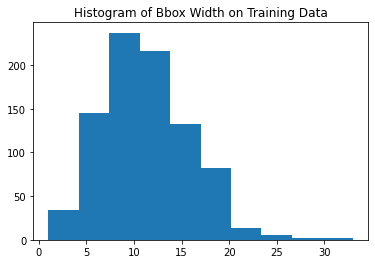

In [ ]:
plt.hist(widths)
plt.title('Histogram of Bbox Width on Training Data')

Text(0.5, 1.0, 'Histogram of Bbox Height on Training Data')

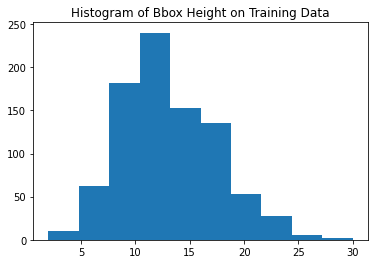

In [ ]:
plt.hist(heights)
plt.title('Histogram of Bbox Height on Training Data')

Text(0.5, 1.0, 'Histogram of Bbox Area on Training Data')

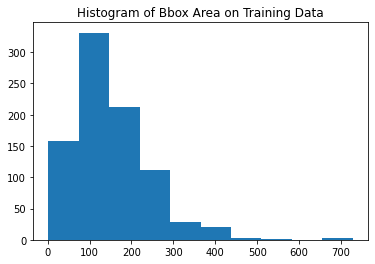

In [ ]:
plt.hist(areas)
plt.title('Histogram of Bbox Area on Training Data')